In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from utilities import plotting
from utilities import stats
from utilities import timestamps
from utilities import import_export
from utilities import polygon_selection
from mpl_toolkits.basemap import Basemap
from itertools import product
import matplotlib.pyplot as plt

In [2]:
import_export.print_test()

AttributeError: module 'utilities.import_export' has no attribute 'print_test'

In [3]:
df = import_export.import_catalog(location='data/ccu.dat', delimiter='\t', names=['lon', 'lat', 'decimal_year', 'month', 'day', 'mag'
                                                        , 'depth', 'hour', 'minute', 'second', 'horizontal_error'
                                                        , 'depth_error', 'mag_err'])

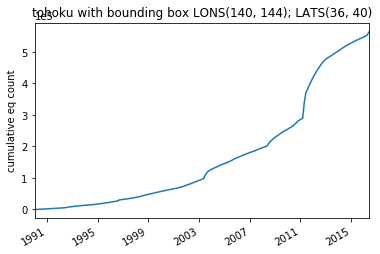

In [5]:
df1 = polygon_selection.filter_by_lon_lat(df, lons=[140, 144], lats=[36, 40])
fig, ax = plt.subplots()
fig, ax = plotting.plot_seismicity_rate(df1, fig, ax)
ax.set_title('tohoku with bounding box LONS(140, 144); LATS(36, 40)')

In [6]:
m = Basemap(lon_0=142, projection='merc')

df2 = polygon_selection.get_node_data(data=df, node=(131,33), radius=75, m=m)

In [13]:
from geopy.distance import great_circle

great_circle((130, 32), (131, 32)).kilometers

111.22625530463172

In [8]:
polygon_selection.get_node_data(data=df.head(0), node=(140,37), radius=75, m=1)

,lon,lat,decimal_year,month,day,mag,depth,hour,minute,second,horizontal_error,depth_error,mag_err,distance
timestamp,,,,,,,,,,,,,,


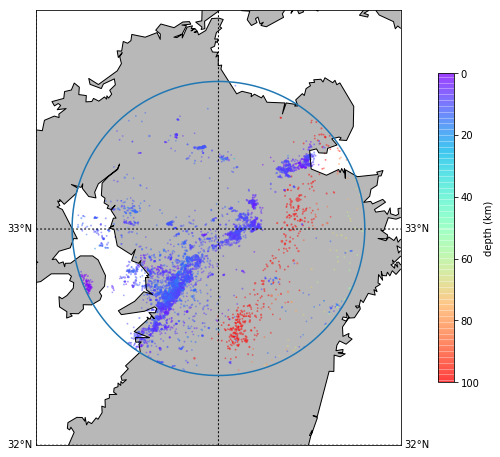

In [9]:
m, fig, ax = plotting.plot_seismicity_map(dataframe=df2[df2.mag>2])
plotting.equi(m=m, centerlon=131, centerlat=33, radius=75)

/home/max/anaconda2/envs/research/lib/python3.5/site-packages/ipykernel_launcher.py:9: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  if __name__ == '__main__':


<a list of 5 text.Text objects>

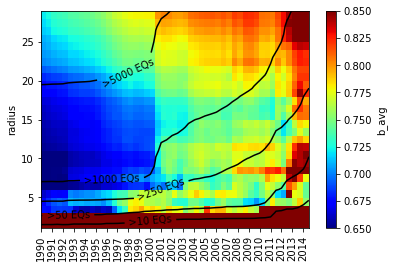

In [11]:
bdf = pd.read_csv('radius_time_sweep_fm_main.csv')

fig, ax = plt.subplots()
plotting.plot_radius_time_sweep(dataframe=bdf, vertical_axis='radius'
                                 , value='b_avg', vmin=0.65, vmax=0.85, cmap='jet'
                                         , fig=fig, ax=ax)

zi = bdf.pivot(index='start_time', columns='radius', values='n_avg')
xi_label = [np.datetime64(z, 'Y') for z in zi.index]
xi = np.arange(len(xi_label))
yi = zi.columns
xi, yi = np.meshgrid(xi, yi)

zi = np.ma.masked_invalid(zi).transpose()

levels = [10, 50, 250, 1000, 5000]
cs = ax.contour(xi,yi,zi, levels, colors='black')#, locator=ticker.LogLocator())

cs.levels = ['>10 EQs', '>50 EQs','>250 EQs', '>1000 EQs', '>5000 EQs']

ax.clabel(cs, cs.levels, inline=True)